## Restaurant Reviews

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:/Users/Om/Downloads/tasks.csv")         # Loading the dataset

In [3]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
df['Rating text'] = df['Rating text'].fillna('Not Rated')

In [5]:
rating_counts = df['Rating text'].value_counts()

In [6]:
df['Review Length'] = df['Rating text'].apply(len)

In [7]:
grouped = df.groupby('Rating text').agg({                                 # Avg rating ang review length
    'Aggregate rating': 'mean',
    'Review Length': 'mean',
    'Restaurant ID': 'count'
}).rename(columns={'Restaurant ID': 'Count'}).sort_values(by='Aggregate rating', ascending=False)

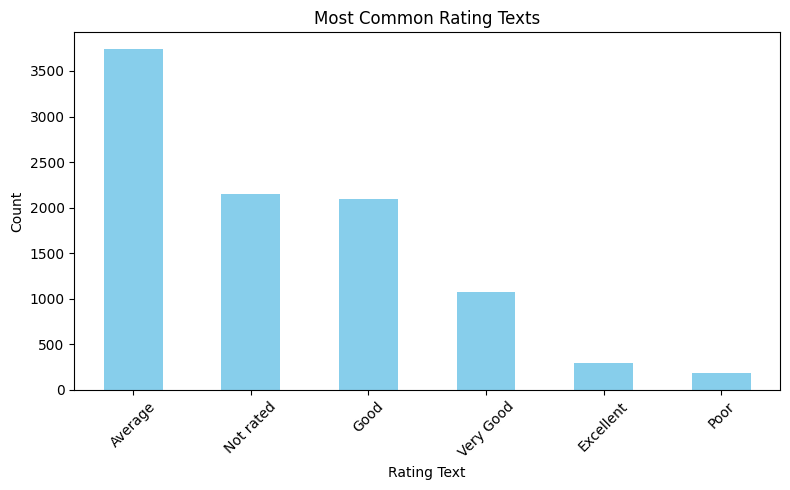

In [8]:
plt.figure(figsize=(8, 5))                                                # Plot distribution
rating_counts.plot(kind='bar', color='skyblue')
plt.title("Most Common Rating Texts")
plt.xlabel("Rating Text")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

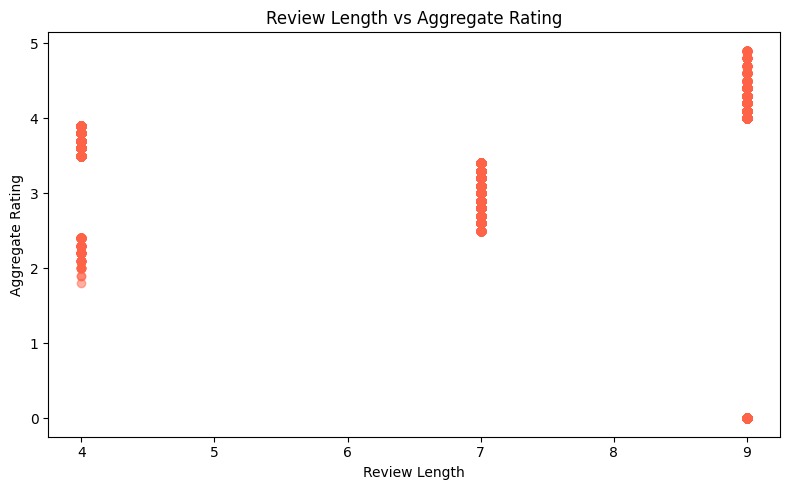

In [9]:
plt.figure(figsize=(8, 5))                                                                 # Plot distribution
plt.scatter(df['Review Length'], df['Aggregate rating'], color='tomato', alpha=0.5)
plt.title("Review Length vs Aggregate Rating")
plt.xlabel("Review Length")
plt.ylabel("Aggregate Rating")
plt.tight_layout()
plt.show()

In [10]:
print(grouped)                                                             # Grouped summary

             Aggregate rating  Review Length  Count
Rating text                                        
Excellent            4.659801            9.0    301
Very Good            4.168119            9.0   1079
Good                 3.683429            4.0   2100
Average              3.051619            7.0   3737
Poor                 2.297849            4.0    186
Not rated            0.000000            9.0   2148
